In [155]:
import matplotlib.pyplot as plt
import numpy as np

In [156]:
epsilon = [1.25,1.5,1.75,2,2.25,2.5]

In [157]:
correct_H = ((0,4),(1,5),(2,6),(3,7),(4,8),(5,9),(4,0),(5,1),(6,2),(7,3),(8,4),(9,5))
standard = []
for i in range(10):
    temp = []
    for j in range(10):
        if (i,j) not in correct_H:
            temp.append(0) 
        else:
            temp.append(1)
    standard.append(temp)
standard

[[0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
 [1, 0, 0, 0, 0, 0, 0, 0, 1, 0],
 [0, 1, 0, 0, 0, 0, 0, 0, 0, 1],
 [0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 1, 0, 0, 0, 0]]

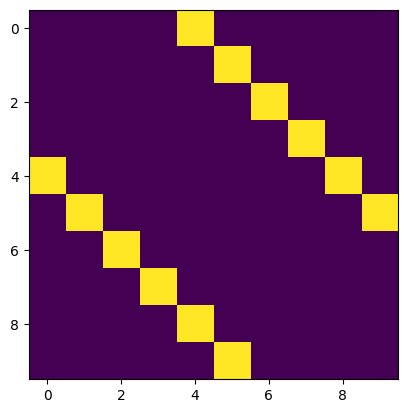

In [158]:
plt.imshow(standard)

# 细致平衡

$$
P(1\to 2)N_1=P(2\to 1)N_2
$$

$$
U_2>U_1
$$

$$
\frac{P(1\to 2)}{P(2\to 1)}=\frac{N_2}{N_1}=\frac{\exp(-\frac{U_2}{kT})}{\exp(-\frac{U_1}{kT})}=\exp(-\frac{U_2-U_1}{kT})
$$

$$
P(1\to 2)=\exp(-\frac{U_2-U_1}{kT})
$$


$$
P(2\to 1)=1
$$

In [159]:
def delta_U(position,current_epsilon): #在某个位置改变氢键状态造成的能量变化量
    global peptide
    x,y = position
    if (x,y) in correct_H and peptide[x][y]==0: #将在正确的位置形成氢键
        return -current_epsilon
    if (x,y) in correct_H and peptide[x][y]==1: #将破坏正确位置已经形成的氢键
        return +current_epsilon
    if (x,y) not in correct_H and peptide[x][y]==0: #将在错误的位置形成氢键
        return +current_epsilon
    if (x,y) not in correct_H and peptide[x][y]==1: #将破坏错误位置已经形成的氢键
        return -current_epsilon


In [160]:
def determine(delta_e):
    if delta_e  < 0:
        return True
    else:
        random_number = np.random.uniform(0, 1)
        boltzmann_factor = np.exp(-delta_e)
        if random_number < boltzmann_factor:
            return True
        else: return False

In [161]:
def find_the_lucky_dog():
    x=y=0
    while x==y:
        x = np.random.randint(0, 10)
        y = np.random.randint(0, 10)
    return [x,y]

In [163]:
mean_steps_to_steady_state = []
for energy in epsilon:
    temp = []
    for N in range(100):
        initial_peptide = []
        for i in range(10):
            temp = []
            for j in range(10):
                temp.append(0) # 初始条件没有氢键，全0
            initial_peptide.append(temp)
        peptide = initial_peptide
        count = 0
        while(not peptide == standard):
            chosen_position = find_the_lucky_dog()
            if determine(delta_U(position=chosen_position,current_epsilon=energy)):
                x,y = chosen_position
                if peptide[x][y] == 1:
                    peptide[x][y] = peptide[y][x] = 0
                elif peptide[x][y] == 0:
                    peptide[x][y] = peptide[y][x] = 1
            count += 1
        temp.append(count)
    mean_steps_to_steady_state.append(np.mean(np.array(temp)))
        

Text(0, 0.5, 'Mean Steps to Reach Standard Condition (Repeated 100 times)')

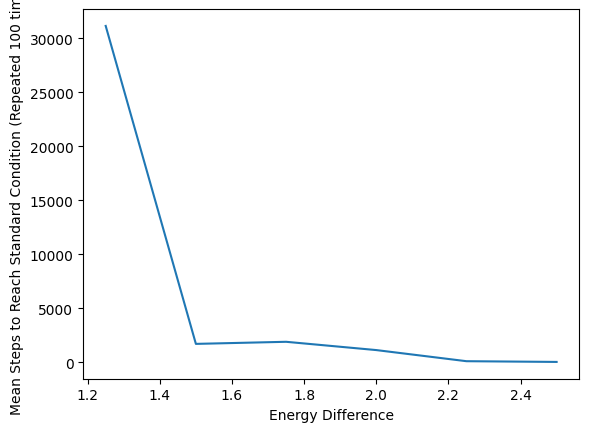

In [164]:
plt.plot(epsilon,mean_steps_to_steady_state)
plt.xlabel('Energy Difference')
plt.ylabel('Mean Steps to Reach Standard Condition (Repeated 100 times)')

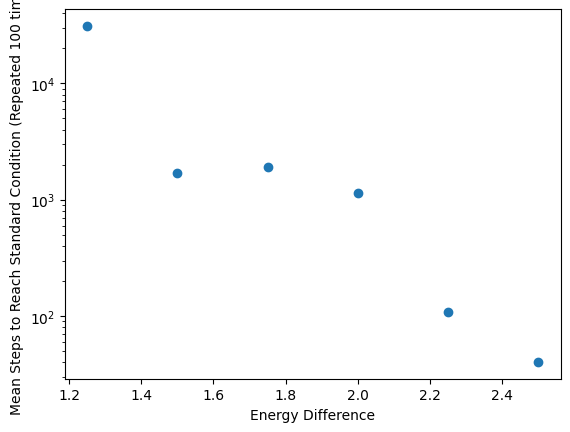

In [165]:
plt.scatter(epsilon,mean_steps_to_steady_state)
plt.xlabel('Energy Difference')
plt.ylabel('Mean Steps to Reach Standard Condition (Repeated 100 times)')
plt.yscale('log')

## 趋势
总体来看，能量越高，为了达到标准状态，需要模拟的步数越少。